In [11]:
file_path = r'C:\Users\Aya\Downloads\Python\Mall_Customers.csv'

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import warnings
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
warnings.filterwarnings('ignore')

In [13]:
# Load the data
data = pd.read_csv(file_path)

In [14]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['float', 'int']).columns.tolist()

In [16]:
# One-hot encode the categorical columns
ohe = OneHotEncoder()
encoded_categorical_data = ohe.fit_transform(data[categorical_cols]).toarray()
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=ohe.get_feature_names_out(categorical_cols))
print(encoded_categorical_df)

     Genre_Female  Genre_Male
0             0.0         1.0
1             0.0         1.0
2             1.0         0.0
3             1.0         0.0
4             1.0         0.0
..            ...         ...
195           1.0         0.0
196           1.0         0.0
197           0.0         1.0
198           0.0         1.0
199           0.0         1.0

[200 rows x 2 columns]


In [17]:
# Standard scale the numerical columns
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(data[numerical_cols])
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols)

In [18]:
# Combine the processed numerical and categorical data
processed_data = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)

In [19]:
# Apply the KMeans algorithm and evaluate using the elbow method and silhouette score
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

K = range(2, 11)  # Starting from 2 because silhouette score is not defined for k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(processed_data, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(processed_data, kmeans.labels_))
    calinski_harabasz_scores.append(calinski_harabasz_score(processed_data, kmeans.labels_))

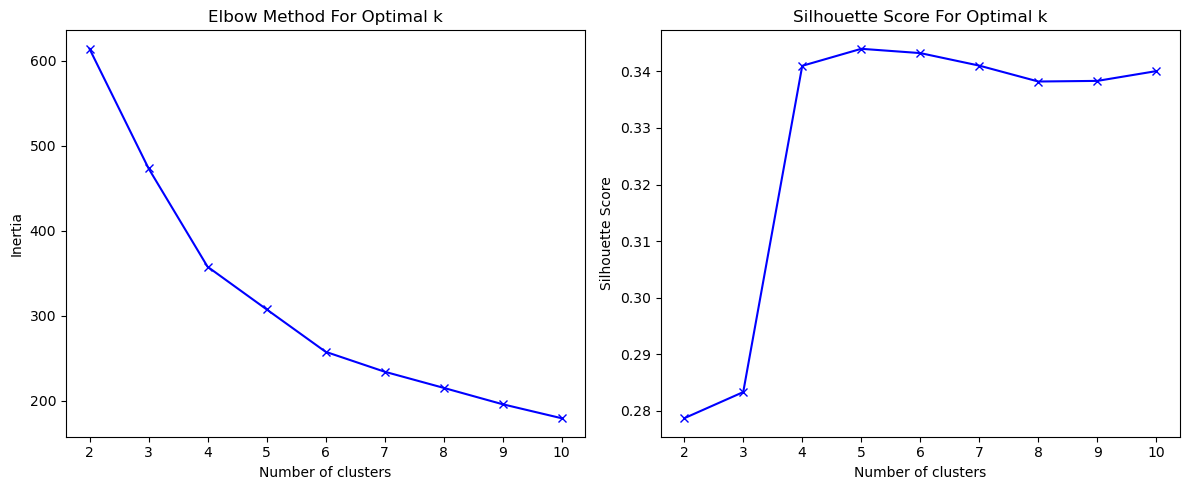

In [20]:
# Plot the elbow method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.tight_layout()
plt.show()


In [21]:
# Determine the best number of clusters using the silhouette score
optimal_k = K[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters based on silhouette score is: {optimal_k}")

# Fit the final KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(processed_data)

# Add the cluster labels to the original data
data['Cluster'] = kmeans_optimal.labels_

# Evaluate the final clustering
final_inertia = kmeans_optimal.inertia_
final_silhouette_score = silhouette_score(processed_data, kmeans_optimal.labels_)
final_davies_bouldin_score = davies_bouldin_score(processed_data, kmeans_optimal.labels_)
final_calinski_harabasz_score = calinski_harabasz_score(processed_data, kmeans_optimal.labels_)

print(f"Final Inertia: {final_inertia}")
print(f"Final Silhouette Score: {final_silhouette_score}")
print(f"Final Davies-Bouldin Index: {final_davies_bouldin_score}")
print(f"Final Calinski-Harabasz Index: {final_calinski_harabasz_score}")

The optimal number of clusters based on silhouette score is: 5
Final Inertia: 307.3777540070557
Final Silhouette Score: 0.3439781660086294
Final Davies-Bouldin Index: 1.0509881092677065
Final Calinski-Harabasz Index: 93.76128921644239


In [22]:
# Apply PCA and keep the top 2 principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(processed_data)

# Apply KMeans on the reduced data
inertia_pca = []
silhouette_scores_pca = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia_pca.append(kmeans.inertia_)
    silhouette_scores_pca.append(silhouette_score(pca_data, kmeans.labels_))
    silhouette_scores.append(silhouette_score(processed_data, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(processed_data, kmeans.labels_))
    calinski_harabasz_scores.append(calinski_harabasz_score(processed_data, kmeans.labels_))

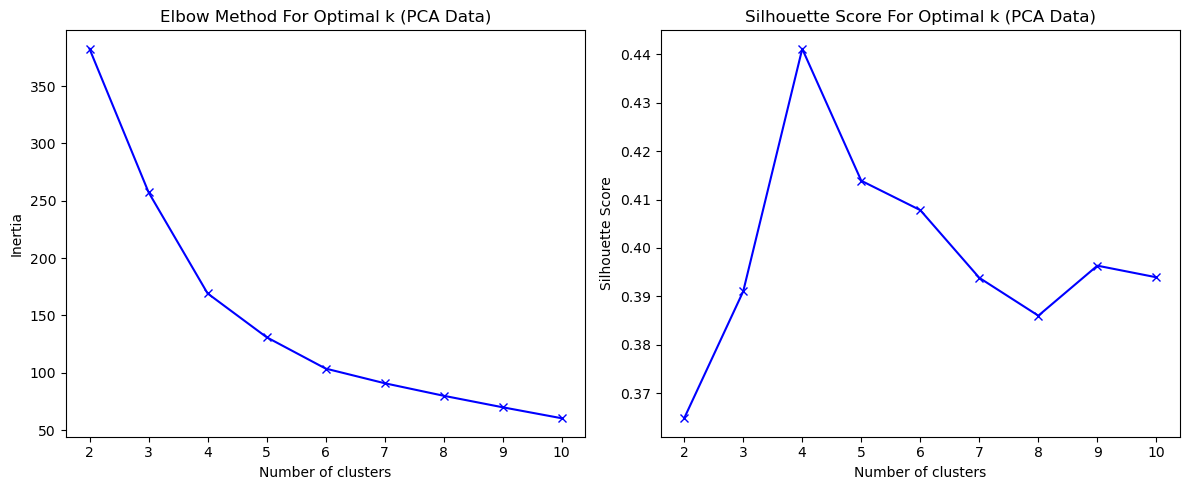

In [23]:
# Plot the elbow method for PCA data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia_pca, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (PCA Data)')

# Plot the silhouette scores for PCA data
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores_pca, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k (PCA Data)')

plt.tight_layout()
plt.show()


In [24]:
# Determine the best number of clusters using the silhouette score for PCA data
optimal_k_pca = K[np.argmax(silhouette_scores_pca)]
print(f"The optimal number of clusters based on silhouette score for PCA data is: {optimal_k_pca}")

# Fit the final KMeans model with the optimal number of clusters on PCA data
kmeans_optimal_pca = KMeans(n_clusters=optimal_k_pca, random_state=42)
kmeans_optimal_pca.fit(pca_data)

# Add the cluster labels to the original data
data['Cluster_PCA'] = kmeans_optimal_pca.labels_

# Evaluate the final clustering for PCA data
final_inertia_pca = kmeans_optimal_pca.inertia_
final_silhouette_score_pca = silhouette_score(pca_data, kmeans_optimal_pca.labels_)
final_davies_bouldin_score_pca = davies_bouldin_score(pca_data, kmeans_optimal_pca.labels_)
final_calinski_harabasz_score_pca = calinski_harabasz_score(pca_data, kmeans_optimal_pca.labels_)

print(f"Final Inertia (PCA): {final_inertia_pca}")
print(f"Final Silhouette Score (PCA): {final_silhouette_score_pca}")
print(f"Final Davies-Bouldin Index (PCA): {final_davies_bouldin_score_pca}")
print(f"Final Calinski-Harabasz Index (PCA): {final_calinski_harabasz_score_pca}")

The optimal number of clusters based on silhouette score for PCA data is: 4
Final Inertia (PCA): 169.22354670559042
Final Silhouette Score (PCA): 0.44117258541128235
Final Davies-Bouldin Index (PCA): 0.7574360995703249
Final Calinski-Harabasz Index (PCA): 190.3534553387555
